HELP International is an international humanitarian NGO that is committed to 
fighting poverty and providing the people of backward countries with basic 
amenities and relief during the time of disasters and natural calamities. After 
the recent project that included a lot of awareness drives and funding 
programmes, they have been able to raise around $ 10 million. The significant 
issues that come while making this decision are mostly related to choosing the 
countries that are in the direst need of aid.
How will you help this NGO to make a correct decision based on socioeconomic and health factors?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and explaining the basic features of the dataset

In [4]:
data =  pd.read_csv(r'D:\Devi\ICT_TVM\ASSIGNMENTS\Country-data.csv')

In [5]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<AxesSubplot:>

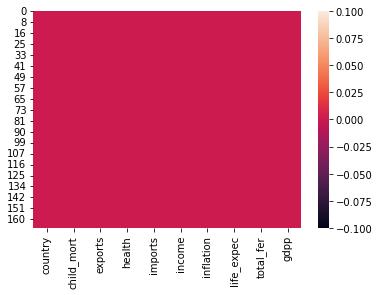

In [65]:
sns.heatmap(data.isnull())

There is no missing values in this dataset

In [7]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
data.shape

(167, 10)

array([[<AxesSubplot:title={'center':'child_mort'}>,
        <AxesSubplot:title={'center':'exports'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'imports'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'inflation'}>],
       [<AxesSubplot:title={'center':'life_expec'}>,
        <AxesSubplot:title={'center':'total_fer'}>,
        <AxesSubplot:title={'center':'gdpp'}>]], dtype=object)

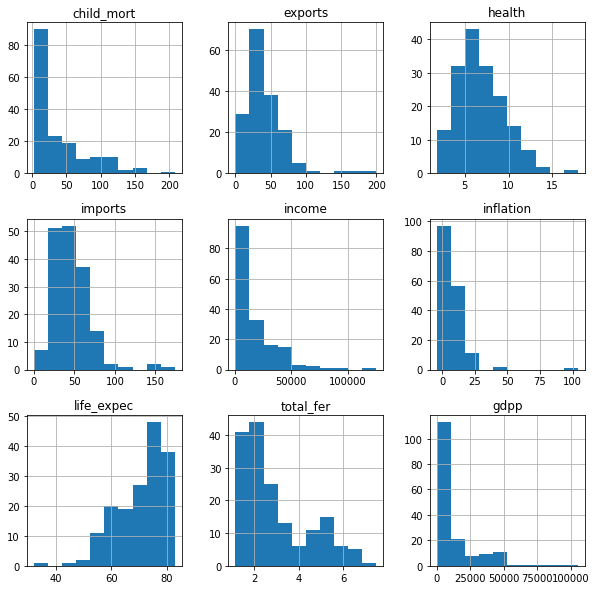

In [9]:
data.hist(figsize=(10,10))


Data is not normally distributed.

In [10]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Scaling the data

There are outliers in income and gdp columns, so we have to handle the outliers properly

In [11]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = data.iloc[:,1:10]
scalar_data = scalar.fit_transform(X)

## Principal Component Analysis

In [12]:
from sklearn.decomposition import PCA

pca = PCA(.99,random_state=42)
principalcomponent = pca.fit_transform(X)
principalDF = pd.DataFrame(data=principalcomponent,columns=['PC1','PC2'])

In [13]:
principalDF

,PC1,PC2
0,-19815.128018,-1651.124720
1,-11338.938992,1493.469028
2,-8926.352589,3264.684102
3,-14652.465937,-867.795270
4,896.142032,1898.478151
...,...,...
162,-17180.967679,-2487.153835
163,-100.445973,-832.252802
164,-17202.017189,-222.889872
165,-17209.340213,-229.815901


In [14]:
pca.explained_variance_

array([6.70739440e+08, 3.68465803e+07])

In [15]:
pca.explained_variance_ratio_

array([0.94792307, 0.05207346])

In [16]:
finalData = principalDF


In [17]:
finalData.head()

,PC1,PC2
0,-19815.128018,-1651.124720
1,-11338.938992,1493.469028
2,-8926.352589,3264.684102
3,-14652.465937,-867.795270
4,896.142032,1898.478151


In [18]:
finalData.shape

(167, 2)

In [19]:
# elbow method
from sklearn.cluster import KMeans

ks = range(1,10)
inertia = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(principalDF)
    inertia.append(model.inertia_)

C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

In [20]:
inertia

[117459279324.62856,
 36527983204.19186,
 21709816385.25595,
 14610328566.708187,
 10655013039.805534,
 7655367831.272919,
 5353422098.543847,
 4357484499.770688,
 3238759332.3537827]

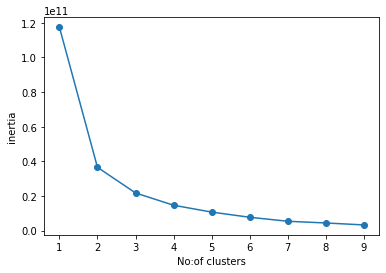

In [21]:
plt.plot(ks,inertia,'-o')
plt.xlabel("No:of clusters")
plt.ylabel("inertia")
plt.show()

from this graph we can choose k=3 as the optimal value.

In [22]:
#KMeans algoritham

model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(principalDF)
label = model_kmeans.predict(principalDF)
print(label)


C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2
 2 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 0 0 1 0 2 0 0 2 2 0 0 0 0 2 1 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0]


In [23]:
model_kmeans.cluster_centers_

array([[-12088.57747102,    305.55829379],
       [ 81976.99353492,   5272.3930453 ],
       [ 30421.84254831,  -2375.56915383]])

In [24]:

finalData['clusters'] = model_kmeans.labels_

In [25]:
finalData.head()

,PC1,PC2,clusters
0,-19815.128018,-1651.124720,0
1,-11338.938992,1493.469028,0
2,-8926.352589,3264.684102,0
3,-14652.465937,-867.795270,0
4,896.142032,1898.478151,0


In [26]:
finalData['clusters'].value_counts()

0    128
2     32
1      7
Name: clusters, dtype: int64

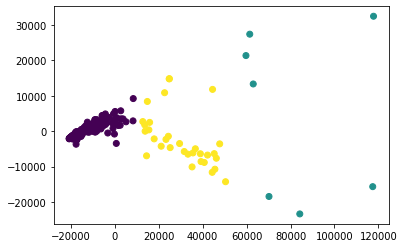

In [27]:
plt.scatter(principalDF['PC1'],principalDF['PC2'],c=label)

In [28]:
all_data=pd.merge(data,finalData, left_index=True,right_index=True)
all_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-19815.128018,-1651.124720,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-11338.938992,1493.469028,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-8926.352589,3264.684102,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-14652.465937,-867.795270,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,896.142032,1898.478151,0


C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Akhil\anacond

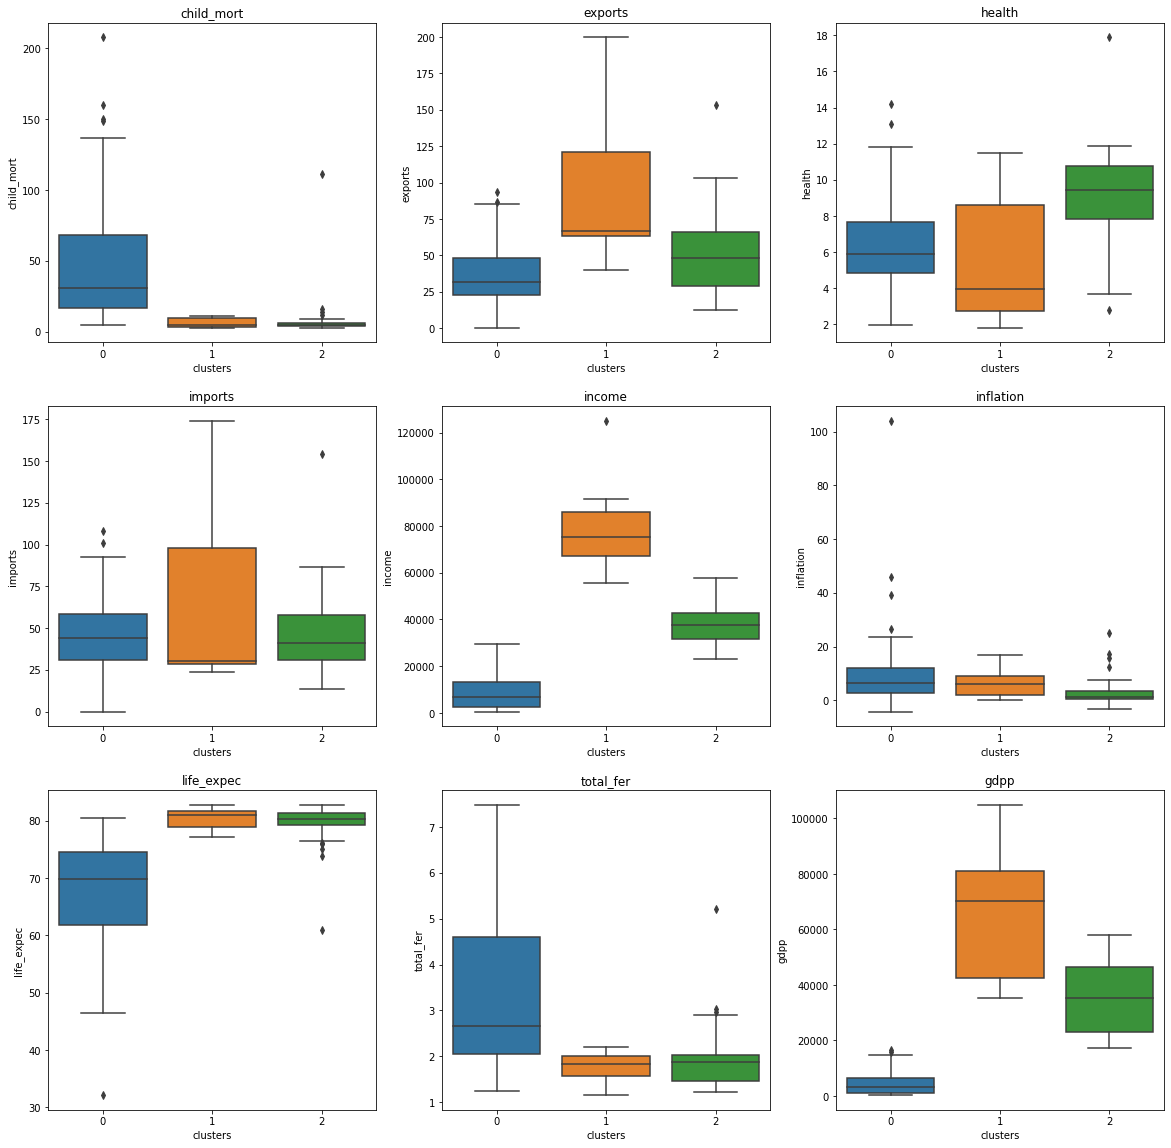

In [31]:
col=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(all_data.clusters,data[col[i]])
    plt.title(col[i])

Countries in cluster 0 needs more help from HELP International NGO because this model predicted that cluster 0 countries have less income and health while comparing with other countries.ALSO child mortality rate and inflation is more in cluster 0.and total_fer also shows that there is an rapid increase in population in cluster 0.gdpp is also less in cluster 0 countries

In [33]:
values=all_data.groupby('clusters').mean()
values['count']=all_data['clusters'].value_counts().sort_index()
values

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,count
clusters,,,,,,,,,,,,
0,47.389844,35.865617,6.332031,45.921609,8569.242188,8.957648,67.873437,3.263359,4438.390625,-12088.577471,305.558294,128
1,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143,81976.993535,5272.393045,7
2,8.800000,49.978125,8.991563,46.021875,37621.875000,3.383312,79.156250,1.944687,35587.500000,30421.842548,-2375.569154,32


In [34]:
country=data['country']
datap=pd.DataFrame({'labels':label,"countries":country})

In [35]:
datap.head()

,labels,countries
0,0,Afghanistan
1,0,Albania
2,0,Algeria
3,0,Angola
4,0,Antigua and Barbuda


In [38]:
aid_needed_countries=all_data['clusters']==0

In [39]:
data[aid_needed_countries]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
